In [52]:
import os
import json
import pyannote.core
from pyannote.core import Timeline, Segment
import statistics
from scipy import stats
import numpy as np
import numpy
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('/Users/andrei-macpro/Documents/Data/Audio/speech_detection_timestamps/speech_detection_meal')

In [27]:
# function that takes as input a list of file-names and outputs a list of pyannote timelines 
path = '/Users/andrei-macpro/Documents/Data/Audio/speech_detection_timestamps/speech_detection_meal'
json_files = [pos_json for pos_json in sorted(os.listdir(path))]
def get_timelines(json_files):
    list_json=list()
    list_timelines=list()
    for filename in json_files: # loop that imports all json data into separate dictionaries
        with open(filename) as json_file:
            data = json.load(json_file)
            list_json.append(data)
    for file, segments in zip(json_files, list_json): # loop to iterate through the files and create a new timeline for each of them 
        timeline=Timeline()
        list_timelines.append(timeline.from_json(segments))
    return list_timelines
    

In [35]:
def get_start_times(list_of_timelines): # returns a list of start_times for both speech and silence from the given timelines
    start_times_speech = [segment.start for timeline in list_of_timelines for segment in timeline if segment.start <=180]
    start_times_silence = [segment.start for timeline in list_of_timelines for segment in timeline.gaps() if segment.start <=180]
    return numpy.array(start_times_speech + start_times_silence)

In [9]:
len(duration_distribution_meal)

NameError: name 'duration_distribution_meal' is not defined

In [36]:
def count_durations(start_times, list_of_timelines):
    duration_distribution_meal = np.zeros(180, dtype=int) # initialize a list that will store the no of occurences of each timepoint
    avg_transitions = np.zeros(180)# initialize a list that will store the average no of transitions at each timepoint
    counter = 1
    while counter <= len(duration_distribution_meal):
        for start_time in start_times: 
            if start_time<=counter:
                duration_distribution_meal[counter-1] +=1 # access the index of the list and decrease by 1 to start from 0 and increase the number by 1
            avg_transitions[counter-1] = duration_distribution_meal[counter-1]/len(list_of_timelines)
        counter += 1 
    return duration_distribution_meal, avg_transitions #i actually don't need the first list

In [37]:
list_timelines_meal=get_timelines(json_files) # list containing the pyannote timeline of each meal recording 

In [38]:
start_times = get_start_times(list_timelines_meal)


In [39]:
duration_distribution_meal, avg_transitions = count_durations(start_times, list_timelines_meal)

In [259]:
%config Completer.use_jedi = False # gets autocomplete to work

In [72]:
sorted(start_times)[0:52] # seems like there are 52 audiofiles with the same start-time and the rest have a different one

[0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.01015625,
 0.09959375000000001]

In [40]:
print(start_times[0])

0.01015625


In [48]:
time = [i for i in range(1, 181)] # how many seconds we're looking at
index_df = [i for i in range(len(time))]
df = pd.DataFrame(list(zip(duration_distribution_meal,avg_transitions, time)), columns = ['Frequency of transitions', 
                                                                                   'Average transitions', 'time'], 
                  index=index_df)
df.head()

,Frequency of transitions,Average transitions,time
0,68,1.114754,1
1,90,1.475410,2
2,119,1.950820,3
3,140,2.295082,4
4,164,2.688525,5


<AxesSubplot:xlabel='time', ylabel='Average transitions'>

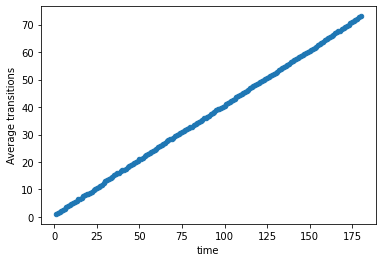

In [271]:
df.plot.scatter(x='time', y='Average transitions')

# now let's do it just for rad and non-rad independently

In [41]:
labels = pd.read_excel('/Users/andrei-macpro/Documents/Data/Results/corpus_processed/corpus_labelled.xlsx', 
                      )
labels.head()

,Subject_ID,Age,DAI,Rinab,WPPSIIQ_T2,Duration_meal,Duration_play,Gender,label
0,1043,60.0,0.0,5,91.0,1042.66,531.58,F,no_rad
1,1047,52.0,6.0,15,109.0,1300.00,391.84,M,rad
2,1049,43.0,2.0,3,74.0,842.32,203.68,M,no_rad
3,1053,33.0,2.0,3,82.0,989.48,419.02,F,no_rad
4,1059,41.0,0.0,31,66.0,965.14,489.52,M,rad


In [42]:
only_rad = labels['Subject_ID'].loc[labels['label']=='rad'].tolist() # these are the subject_id's of rad children 
no_rad = labels['Subject_ID'].loc[labels['label']=='no_rad'].tolist() # and the ones for no-rad children

# first for meal

In [43]:
# json files for each group
json_rad = [file for file in json_files if int(file.split('_')[0]) in only_rad] 
json_norad = [file for file in json_files if int(file.split('_')[0]) in no_rad]

In [44]:
timelines_meal_rad = get_timelines(json_rad) 
start_times_rad = get_start_times(timelines_meal_rad)

In [45]:
timelines_meal_norad = get_timelines(json_norad) 
start_times_norad = get_start_times(timelines_meal_norad)

In [46]:
duration_distribution_meal_rad, avg_transitions_rad = count_durations(start_times_rad, timelines_meal_rad)
duration_distribution_meal_norad, avg_transitions_norad = count_durations(start_times_norad, timelines_meal_norad)


<AxesSubplot:xlabel='time', ylabel='Average transitions norad meal'>

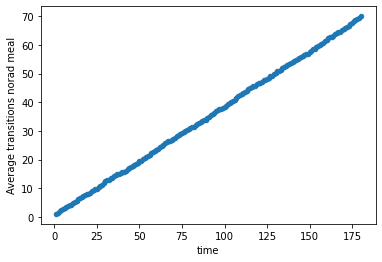

In [49]:
# build df for no rad
df_norad = pd.DataFrame(list(zip(duration_distribution_meal_norad,avg_transitions_norad, time)), columns = [
    'Frequency of transitions norad meal', 'Average transitions norad meal', 'time'], 
                  index=index_df)
df_norad.plot.scatter(x='time', y='Average transitions norad meal')

<AxesSubplot:xlabel='time', ylabel='Average transitions rad meal'>

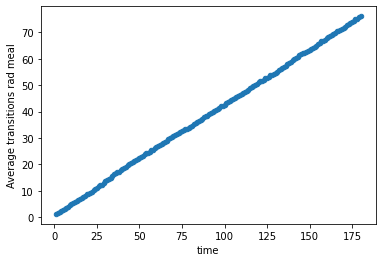

In [50]:
df_rad = pd.DataFrame(list(zip(duration_distribution_meal_rad,avg_transitions_rad, time)), columns = 
                      ['Frequency of transitions rad meal', 
                        'Average transitions rad meal', 'time'], 
                  index=index_df)
df_rad.plot.scatter(x='time', y='Average transitions rad meal')

In [55]:
slope_norad, intercept, r, p, se = stats.linregress(df_norad['time'], df_norad['Average transitions norad meal'])

In [59]:
slope_rad, intercept, r, p, se = stats.linregress(df_rad['time'], df_rad['Average transitions rad meal'])

In [57]:
import math   
print (math.atan(slope_norad))

0.3650548922160152


In [58]:
np.arctan(slope_rad)

NameError: name 'slope_rad' is not defined

In [78]:
slope_rad #meal

0.41630190918101034

In [79]:
slope_norad #meal

0.38218496721158585

# now doing it for play scenes

In [61]:
os.chdir('/Users/andrei-macpro/Documents/Data/Audio/speech_detection_timestamps/speech_detection_play')

In [62]:
path = '/Users/andrei-macpro/Documents/Data/Audio/speech_detection_timestamps/speech_detection_play'
json_files_play = [pos_json for pos_json in sorted(os.listdir(path))]

In [63]:
json_rad_play = [file for file in json_files_play if int(file.split('_')[0]) in only_rad] 
json_norad_play = [file for file in json_files_play if int(file.split('_')[0]) in no_rad]

In [64]:
timelines_meal_rad_play = get_timelines(json_rad_play) 
start_times_rad_play = get_start_times(timelines_meal_rad_play)

In [65]:
timelines_meal_norad_play = get_timelines(json_norad_play) 
start_times_norad_play = get_start_times(timelines_meal_norad_play)

In [66]:
duration_distribution_meal_rad_play, avg_transitions_rad_play = count_durations(start_times_rad_play, timelines_meal_rad_play)
duration_distribution_meal_norad_play, avg_transitions_norad_play = count_durations(start_times_norad_play, timelines_meal_norad_play)

<AxesSubplot:xlabel='time', ylabel='Average transitions norad play'>

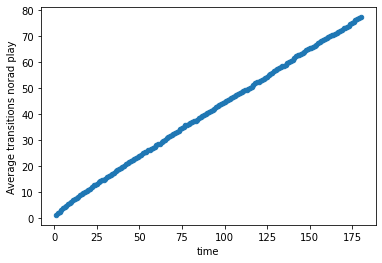

In [67]:
df_norad_play = pd.DataFrame(list(zip(duration_distribution_meal_norad_play,avg_transitions_norad_play, time)), 
                             columns = ['Frequency of transitions norad play', 
                                        'Average transitions norad play', 'time'], 
                  index=index_df)
df_norad_play.plot.scatter(x='time', y='Average transitions norad play')

<AxesSubplot:xlabel='time', ylabel='Average transitions rad play'>

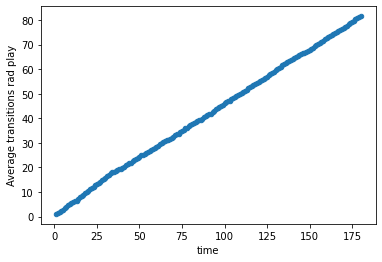

In [68]:
df_rad_play = pd.DataFrame(list(zip(duration_distribution_meal_rad_play,avg_transitions_rad_play, time)), 
                           columns = ['Frequency of transitions rad play', 
                                    'Average transitions rad play', 'time'], 
                  index=index_df)
df_rad_play.plot.scatter(x='time', y='Average transitions rad play')

In [71]:
slope_rad_play, intercept, r, p, se = stats.linregress(df_rad_play['time'], df_rad_play['Average transitions rad play'])
slope_norad_play, intercept, r, p, se = stats.linregress(df_norad_play['time'], df_norad_play['Average transitions norad play'])

In [72]:
slope_rad_play, slope_norad_play

(0.4430270824545339, 0.41528969930374193)

In [74]:
df_meal_play = pd.concat([df_rad, df_norad, df_norad_play, df_rad_play], axis=1)

In [75]:
df_meal_play = df_meal_play.loc[:,~df_meal_play.columns.duplicated()]

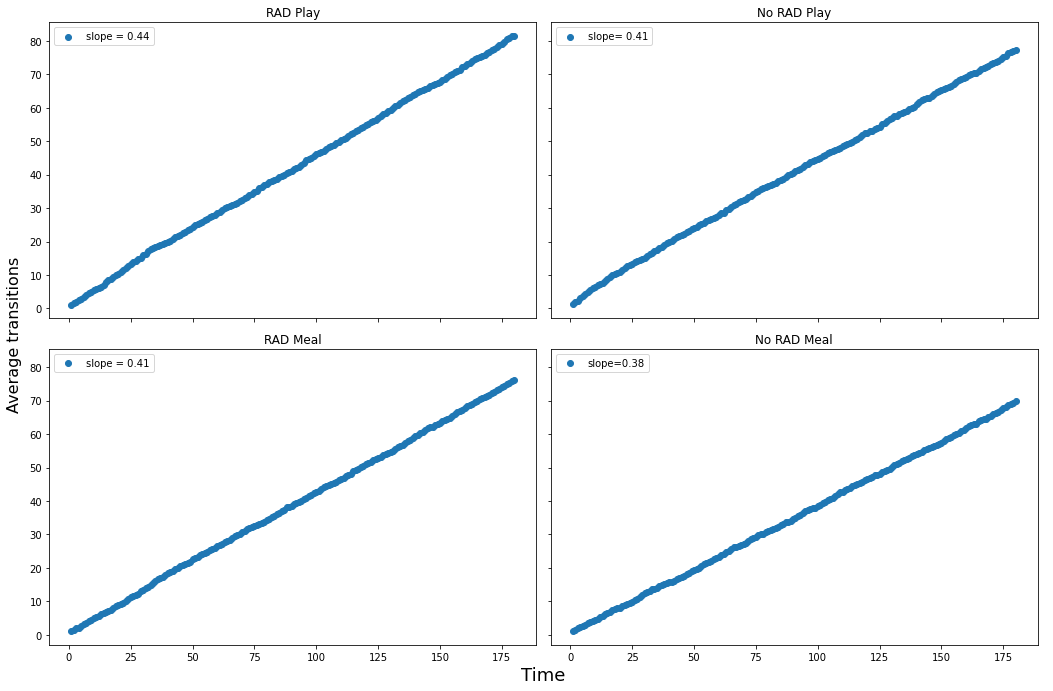

In [80]:
fig, axs = plt.subplots(2, 2, sharex=True,sharey=True, figsize=(15, 10))
axs[0, 0].scatter(df_meal_play['time'], df_meal_play['Average transitions rad play'], label='slope = 0.44')
axs[0, 0].set_title("RAD Play")
axs[0, 0].legend()
axs[1, 0].scatter(df_meal_play['time'], df_meal_play['Average transitions rad meal'], label ='slope = 0.41' )
axs[1, 0].set_title("RAD Meal")
axs[1, 0].legend(loc='upper left')
axs[0, 1].scatter(df_meal_play['time'], df_meal_play['Average transitions norad play'], label = 'slope= 0.41' )
axs[0, 1].set_title("No RAD Play")
axs[0, 1].legend(loc='upper left')
axs[1, 1].scatter(df_meal_play['time'], df_meal_play['Average transitions norad meal'], label = 'slope=0.38' )
axs[1, 1].set_title("No RAD Meal")
axs[1, 1].legend(loc='upper left')
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Time", fontsize=18)
plt.ylabel("Average transitions", fontsize=16)
fig.tight_layout()

# let's look at the average transitions for each scene and group

In [76]:
df_meal_play['Average transitions rad play'], df_meal_play['Average transitions rad meal'], df_meal_play['Average transitions norad play'],
df_meal_play['Average transitions norad meal']

0       1.032258
1       1.451613
2       2.000000
3       2.419355
4       2.774194
         ...    
175    68.193548
176    68.741935
177    69.032258
178    69.451613
179    70.000000
Name: Average transitions norad meal, Length: 180, dtype: float64

In [83]:
stats.ttest_ind(df_meal_play['Average transitions rad meal'],df_meal_play['Average transitions norad meal'])

Ttest_indResult(statistic=1.6622554174845747, pvalue=0.0973368518032041)

In [86]:
stats.ttest_ind(df_meal_play['Average transitions rad play'],df_meal_play['Average transitions norad play'])

Ttest_indResult(statistic=0.5664767210857408, pvalue=0.571424702084822)